<a href="https://colab.research.google.com/github/YoussefAli10/iris-analysis-group1/blob/main/iris_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Create print statements
print('Hello, Iris by Youssef')

Hello, Iris by Youssef


In [ ]:
#Create print statements
print('Hello, Iris by Sibo')

Hello, Iris by Sibo


In [ ]:
#Create print statements
print('Hello, Iris by Wendy')

Hello, Iris by Wendy


In [ ]:
# Store basic dataset metadata
#Assign variables to store metadata
n_rows = 150
dataset_name = "Iris Dataset"

#Use formatted strings to print metadata
print(f"Dataset: {dataset_name}")
print(f"Number of rows: {n_rows}")


Dataset: Iris Dataset
Number of rows: 150


In [ ]:
# Example: check petal length threshold
#Use if and else statements to check length of petal length
petal_length = 1.7
if petal_length > 1.5:
    print("Large petal")
else:
    print("Small petal")


Large petal


In [ ]:
#Use def function to classify sepal_length and petal_length
#Use if/elif/else statements to check whether the lengths are small,medium,large
def classify_flower(sepal_length, petal_length):
    """
    Returns a label 'small'/'medium'/'large' based on petal_length.
    (Simple thresholds for demo; not a trained model.)
    """
    if petal_length < 1.5:
        return "small"
    elif petal_length < 4.5:
        return "medium"
    else:
        return "large"

# quick sanity checks
print(classify_flower(5.1, 1.4))  # small
print(classify_flower(6.0, 3.5))  # medium
print(classify_flower(6.3, 5.0))  # large


small
medium
large


In [ ]:
# Iterate through Iris species and print them
species = ["setosa", "versicolor", "virginica"]
#For loop iterates through each item in the species list
for s in species:
    print(s)

setosa
versicolor
virginica


In [ ]:
# To grab the dataset
from google.colab import files
upload = files.upload()

Saving iris.data to iris.data


In [ ]:
import csv
import statistics
import pandas as pd

# Step 1: Define header
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Step 2: Read raw data using csv module
with open("iris.data", "r") as f:
    reader = csv.reader(f)
    rows = [row for row in reader if len(row) == 5]  # only complete rows

In [ ]:
# ------------------------
# Step 3: create summary.txt
numeric_data = {col: [] for col in header[:-1]}
for row in rows:
    for i, col in enumerate(header[:-1]):
        try:
            numeric_data[col].append(float(row[i]))
        except ValueError:
            continue

summary_csv = f"Row count: {len(rows)}\n\n"
for col, values in numeric_data.items():
    summary_csv += (
        f"Column: {col}\n"
        f"  Min: {min(values):.2f}\n"
        f"  Max: {max(values):.2f}\n"
        f"  Mean: {statistics.mean(values):.2f}\n\n"
    )

with open('summary.txt', 'w') as f:
    f.write(summary_csv)

print("Summary.txt created")


Summary.txt created


In [ ]:

# Step 1: Load the raw CSV with header names
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv("iris.data", header=None, names=header)

# Step 2: Clean the dataset
# 1. Remove completely empty rows
df.dropna(how='all', inplace=True)

# 2. Remove duplicates
df.drop_duplicates(inplace=True)

# 3. Convert numeric columns to float (in case of string values)
for col in header[:-1]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. Fill missing numeric values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Step 3: Save the cleaned dataset
df.to_csv('iris_cleaned.csv', index=False)
print("iris_cleaned.csv saved!")

iris_cleaned.csv saved!


In [ ]:
numeric_cols = header[:-1]
summary_clean = f"Row count: {len(df)}\n\n"

for col in numeric_cols:
    summary_clean += (
        f"Column: {col}\n"
        f"  Min: {df[col].min():.2f}\n"
        f"  Max: {df[col].max():.2f}\n"
        f"  Mean: {df[col].mean():.2f}\n\n"
    )

with open('clean_summary.txt', 'w') as f:
    f.write(summary_clean)

print("clean_summary.txt created:")

clean_summary.txt created:


# Phase 4: Analysis & Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("iris_cleaned.csv")


# Display first few rows
df.head()
#to see everything
#df

#print(df.(head))
#will still print but not as nicely, becuase collab automatically displays it

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
species_list = df['species'].unique()  # gets unique species
counts = [0] * len(species_list) # initialize counts

for s in df['species']:
    for i, species in enumerate(species_list):
        if s == species:
            counts[i] += 1
#enumerate helps match each value in a row to its column name.

for species, count in zip(species_list, counts):
    print(f"{species}: {count}")

Iris-setosa: 48
Iris-versicolor: 50
Iris-virginica: 49


In [ ]:
def categorize_petal_length(length):
    if length < 2:
        return "Short Petal"
    elif 2 <= length <= 5:
        return "Medium Petal"
    else:
        return "Long Petal"

df['Petal_Category'] = df['petal_length'].apply(categorize_petal_length)
df[['petal_length', 'Petal_Category']]


,petal_length,Petal_Category
0,1.4,Short Petal
1,1.4,Short Petal
2,1.3,Short Petal
3,1.5,Short Petal
4,1.4,Short Petal
...,...,...
145,5.2,Long Petal
146,5.0,Medium Petal
147,5.2,Long Petal
148,5.4,Long Petal


In [ ]:
stats = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].agg(['mean', 'median', 'min', 'max'])
stats


,sepal_length,sepal_width,petal_length,petal_width
mean,5.856463,3.055782,3.780272,1.208844
median,5.800000,3.000000,4.400000,1.300000
min,4.300000,2.000000,1.000000,0.100000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
group_stats = df.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
group_stats


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.010417,3.431250,1.462500,0.250000
Iris-versicolor,5.936000,2.770000,4.260000,1.326000
Iris-virginica,6.604082,2.979592,5.561224,2.028571


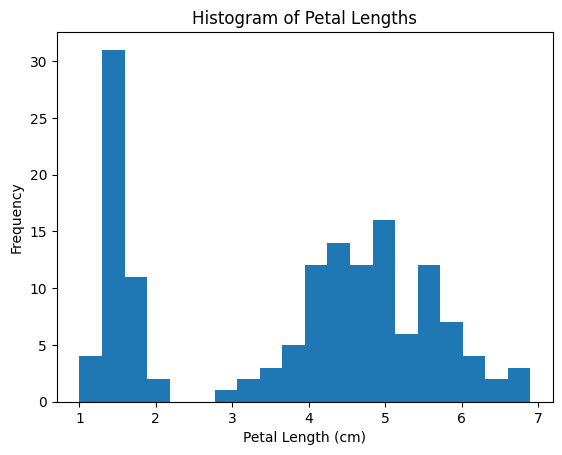

In [ ]:
plt.hist(df['petal_length'], bins=20)
plt.title("Histogram of Petal Lengths")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.show()


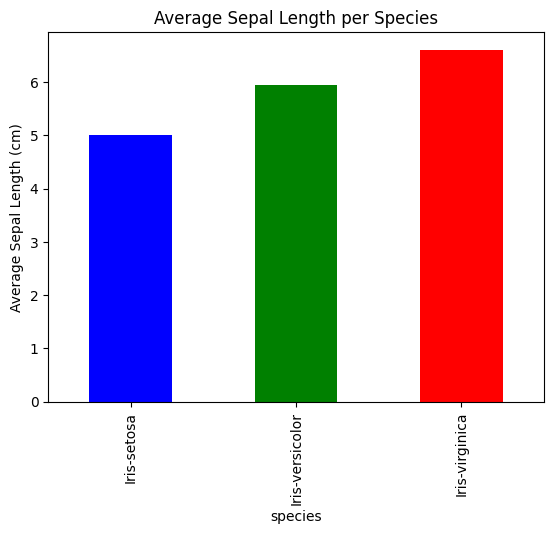

In [ ]:
avg_sepal = df.groupby('species')['sepal_length'].mean()
avg_sepal.plot (kind='bar', color=['blue', 'green', 'red'])
plt.title("Average Sepal Length per Species")
plt.ylabel("Average Sepal Length (cm)")
plt.show()


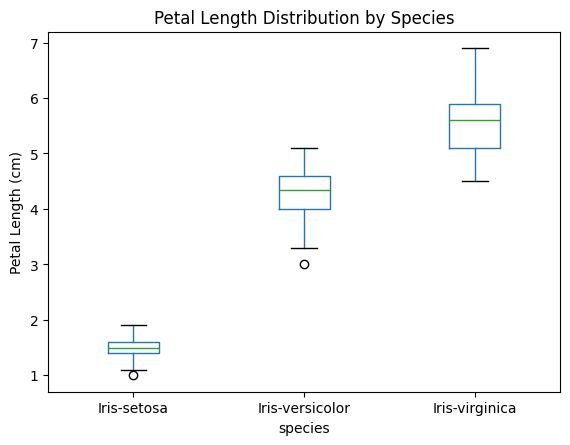

In [ ]:
df.boxplot(column='petal_length', by='species', grid=False)
plt.title("Petal Length Distribution by Species")
plt.suptitle("")
plt.ylabel("Petal Length (cm)")
plt.show()


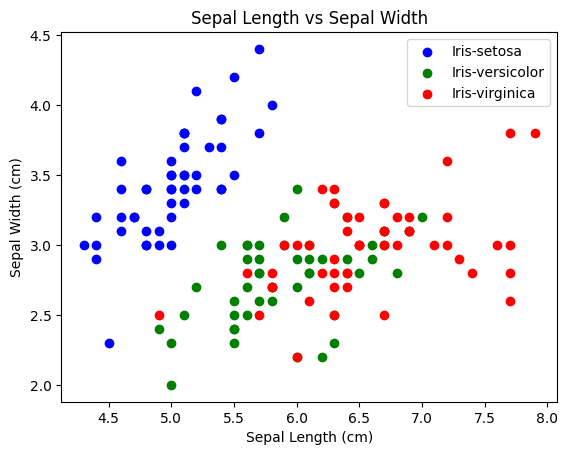

In [ ]:
colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}

for species, color in colors.items():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species, color=color)

plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.show()


In [ ]:
df.to_csv("iris_classes.csv", index=False)
print(" iris_classes.csv created successfully!")


 iris_classes.csv created successfully!
